## Librerias 

In [1]:
#Se importan las librerias de trabajo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py 
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
import scipy.cluster.hierarchy as sch #Dibuja el demograma
from scipy import stats
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import DBSCAN 
from sklearn.ensemble import IsolationForest

## Análisis Exploratoroio (EDA)

In [2]:
#Importa el archivo "Mall_Customers_data.csv" y se lo transforma a DataFrame
df_Mall_Customer = pd.read_csv('Mall_Customers_data.csv')
#Muestra el tamaño del dataframe y las primeras 5 filas del mismo
print(df_Mall_Customer.shape,'\n',df_Mall_Customer.head(5))

(200, 5) 
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


El DataFrame esta compuesto por 5 columnas: CustomerID (Identificación del cliente), Gender (Género), Age (Edad), Anual Income (Ingresos anuales) y Spending Score (Puntuación de gasto). Y 200 filas. 

In [3]:
#Renombramos las columnas
#Crea un diccionario con los nombres originales y los nuevos nombres
nombres_columnas = {
    'CustomerID':'IDcliente',
    'Gender':'Genero',
    'Age':'Edad',
    'Annual Income (k$)':'Ingresos Anuales (k$)',
    'Spending Score (1-100)':'Puntuacion de gasto (1-100)'
}

#Renonbra las columas
df_Mall_Customer = df_Mall_Customer.rename(columns=nombres_columnas)
df_Mall_Customer.head(2)

,IDcliente,Genero,Edad,Ingresos Anuales (k$),Puntuacion de gasto (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [4]:
#Muestra por columna la cantidad de datos nulos
df_Mall_Customer.isnull().sum()

IDcliente                      0
Genero                         0
Edad                           0
Ingresos Anuales (k$)          0
Puntuacion de gasto (1-100)    0
dtype: int64

In [5]:
#Muestra información estadistica de las columnas númericas
df_Mall_Customer.describe()

,IDcliente,Edad,Ingresos Anuales (k$),Puntuacion de gasto (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Información clave:

* Se analizó un total de 200 clientes

* La edad promedio de los clientes es de aproximadamente 38,85 años.

* El ingreso anual promedio de los clientes es de alrededor de $60,56 mil dolares.

* La puntuación de gasto promedio de los clientes es de aproximadamente 50,2.

* La desviación estándar  para la edad es aproximadamente 13,97 años, para el ingreso anual es aproximadamente 26,26 mil dolares, y para la puntuación de gastos es aproximadamente 25,82.

* La edad de los clientes varía entre 18 y 70 años. El ingreso anual varía entre $15 mil y $137mil. La puntuación de gasto varía entre 1 y 99.

* Los cuartiles proporcionan información sobre la distribución de los datos.



In [6]:
# Elimina la columna IDcliente
df_Mall_Customer = df_Mall_Customer.drop(columns=['IDcliente'])
# Saca una muestra de 5 filas aleatorias 
df_Mall_Customer.sample(5)

,Genero,Edad,Ingresos Anuales (k$),Puntuacion de gasto (1-100)
120,Male,27,67,56
104,Male,49,62,56
35,Female,21,33,81
67,Female,68,48,48
30,Male,60,30,4


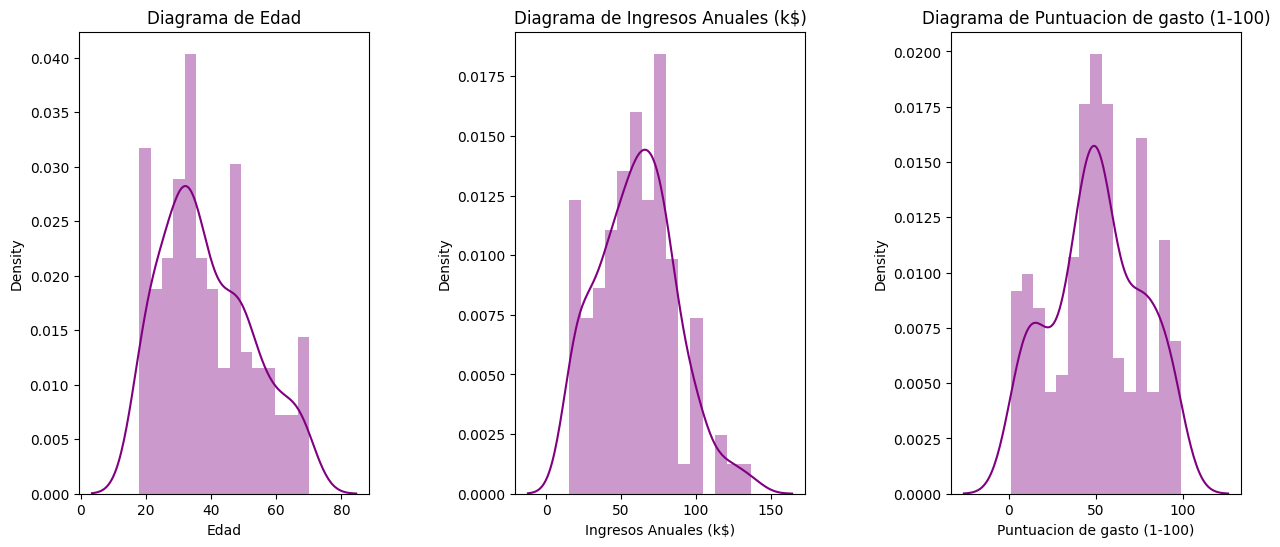

In [7]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Edad' , 'Ingresos Anuales (k$)' , 'Puntuacion de gasto (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df_Mall_Customer[x] , bins = 15, color= 'Purple')
    plt.title('Diagrama de {}'.format(x))
plt.show()

Los 3 diagramas tiene una forma unimodal. En el diagrama de Edad se observa un pico central en torno a los 40 años, esto indica que la mayoría de las personas del grupo se encuentran en este rango de edad. El diagrama parece ser ligeramente asimétrico a la derecha. Esto significa que la cola derecha (personas mayores) es un poco más larga que la cola izquierda (personas más jovenes). El diagrama parece tener una curtosis normal.

El diagrama de Ingreso anual tiene un pico central en torno a los 75mil dolares, esto indica que la mayoría de las personas del grupo ganan alrededor de esta cantidad. El diagrama parece ser ligeramente asimétrico a la derecha, esto significa que la cola derecha (personas con mayores ingresos) es un poco más larga que la cola izquierda (personas con menores ingresos). El diagrama parece tener una curtosis normal.

El diagrama de Puntaje de Gasto tiene un pico central en torno a los 75 puntos, esto indica que la mayoría de las personas del grupo tienen un puntaje de gastos alrededor de este valor. El diagrama parece ser simétrico, con las dos colas de la misma longitud. El diagrama parece tener una curtosis normal.

## Outliers

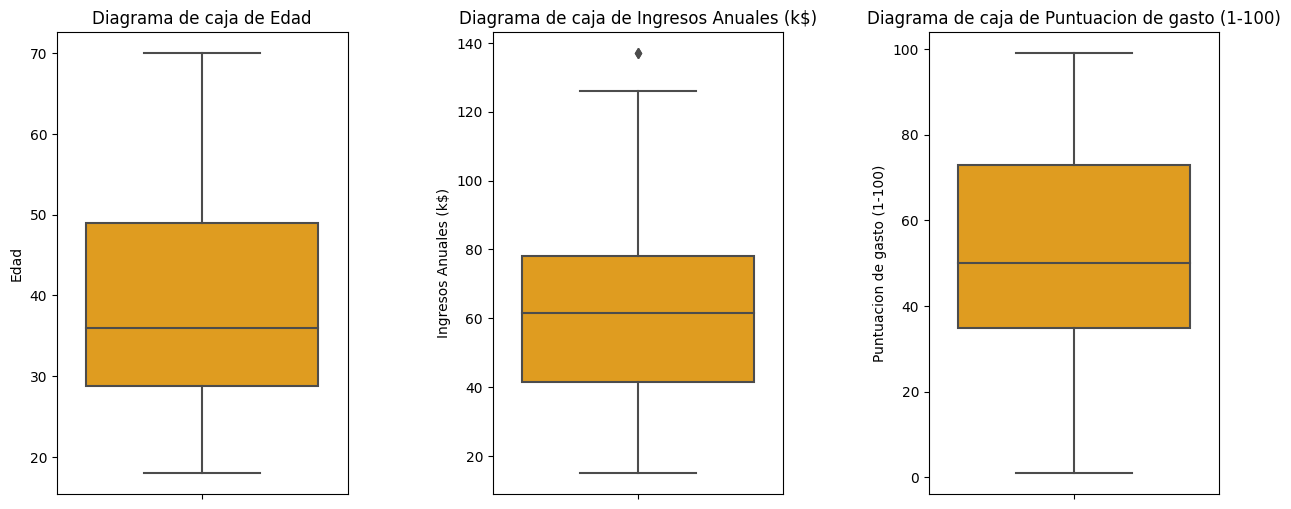

In [8]:
# Añadir gráficos de caja
plt.figure(2 , figsize = (15 , 6))
n = 0 
for x in ['Edad' , 'Ingresos Anuales (k$)' , 'Puntuacion de gasto (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.boxplot(y = df_Mall_Customer[x] , color = 'Orange')
    plt.title('Diagrama de caja de {}'.format(x))
plt.show()

In [9]:
#Verificación analítica
score = stats.zscore(df_Mall_Customer['Ingresos Anuales (k$)'])
score.argmax()

198

In [10]:
print(score)

0     -1.738999
1     -1.738999
2     -1.700830
3     -1.700830
4     -1.662660
         ...   
195    2.268791
196    2.497807
197    2.497807
198    2.917671
199    2.917671
Name: Ingresos Anuales (k$), Length: 200, dtype: float64


In [11]:
#Muestra la fila 198
df_Mall_Customer.iloc[198]

Genero                         Male
Edad                             32
Ingresos Anuales (k$)           137
Puntuacion de gasto (1-100)      18
Name: 198, dtype: object

## Genero

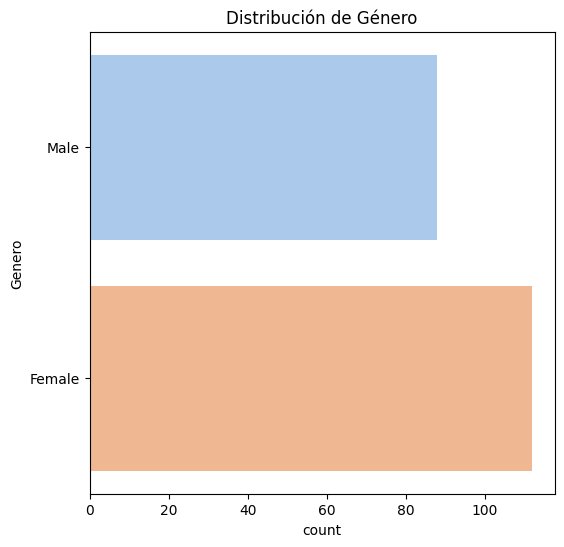

In [12]:
#Grafico de barras para columna 'Genero'
plt.figure(3, figsize= (6, 6))
sns.countplot(y='Genero', data=df_Mall_Customer, palette='pastel')
plt.title('Distribución de Género')
plt.show()

En este gráfico de distribución de género muestra que el grupo está compuesto mayoritariamente por mujeres.

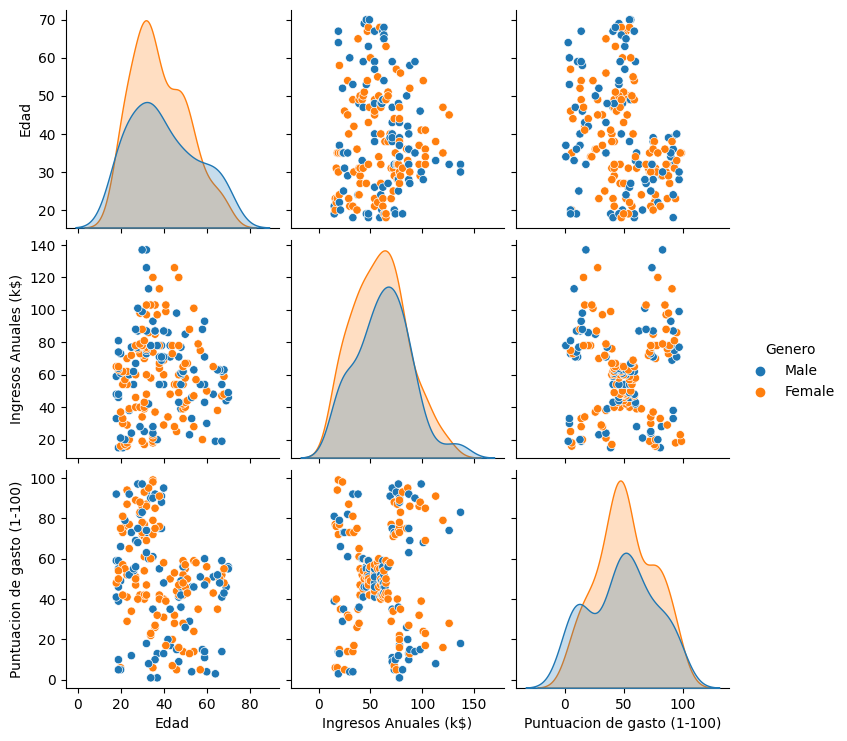

In [13]:
#Realiza una matriz de gráficos de dispersión que muestran la relación entre la edad, los ingresos anuales y la puntuación de gasto, diferenciados por género.
sns.pairplot(df_Mall_Customer, vars=['Edad' , 'Ingresos Anuales (k$)' , 'Puntuacion de gasto (1-100)'], hue = 'Genero')

## Label Encoding

A continuación, previo a empezar con el análisis, se deben convertir las variables catégoricas (la columna 'Genero' en este caso) a variables númericas para que sean interpretables por los algoritmos que se aplicaran posteriormente.

In [14]:
#Copia el DataFrame original
df_Mall_Customer_encoder  = df_Mall_Customer.copy()

#Inicializa el codificador de etiquetas
label_encoder = preprocessing.LabelEncoder()

#Aplica la transformación en el nuevo DataFrame
df_Mall_Customer_encoder['Genero'] = label_encoder.fit_transform(df_Mall_Customer_encoder['Genero'])

#Muestra las primeras filas del nuevo DataFrame
df_Mall_Customer_encoder.head(5)

,Genero,Edad,Ingresos Anuales (k$),Puntuacion de gasto (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Correlación

In [15]:
correlación = df_Mall_Customer_encoder.corr()

In [16]:
correlación

,Genero,Edad,Ingresos Anuales (k$),Puntuacion de gasto (1-100)
Genero,1.000000,0.060867,0.056410,-0.058109
Edad,0.060867,1.000000,-0.012398,-0.327227
Ingresos Anuales (k$),0.056410,-0.012398,1.000000,0.009903
Puntuacion de gasto (1-100),-0.058109,-0.327227,0.009903,1.000000


<Axes: >

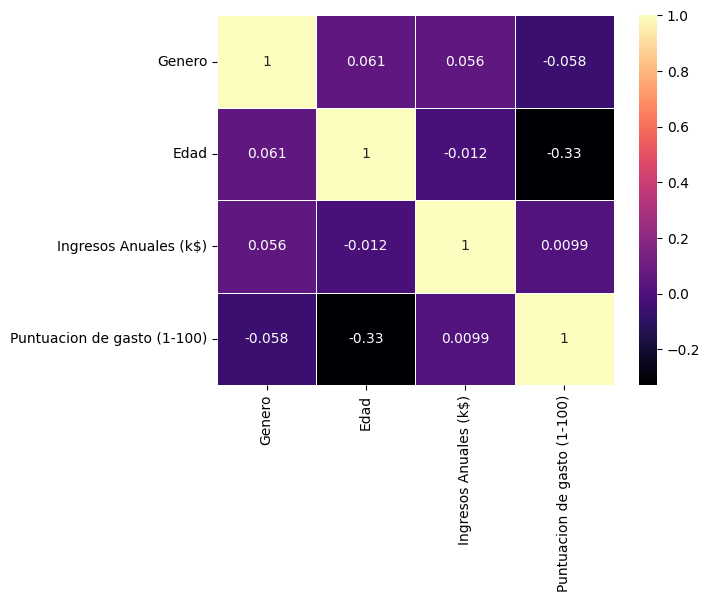

In [17]:
sns.heatmap(correlación, linewidths=.5, cmap='magma',annot=True)

## Dendograma

In [18]:
X = df_Mall_Customer_encoder.iloc[:,[2,3]].values

<function matplotlib.pyplot.show(close=None, block=None)>

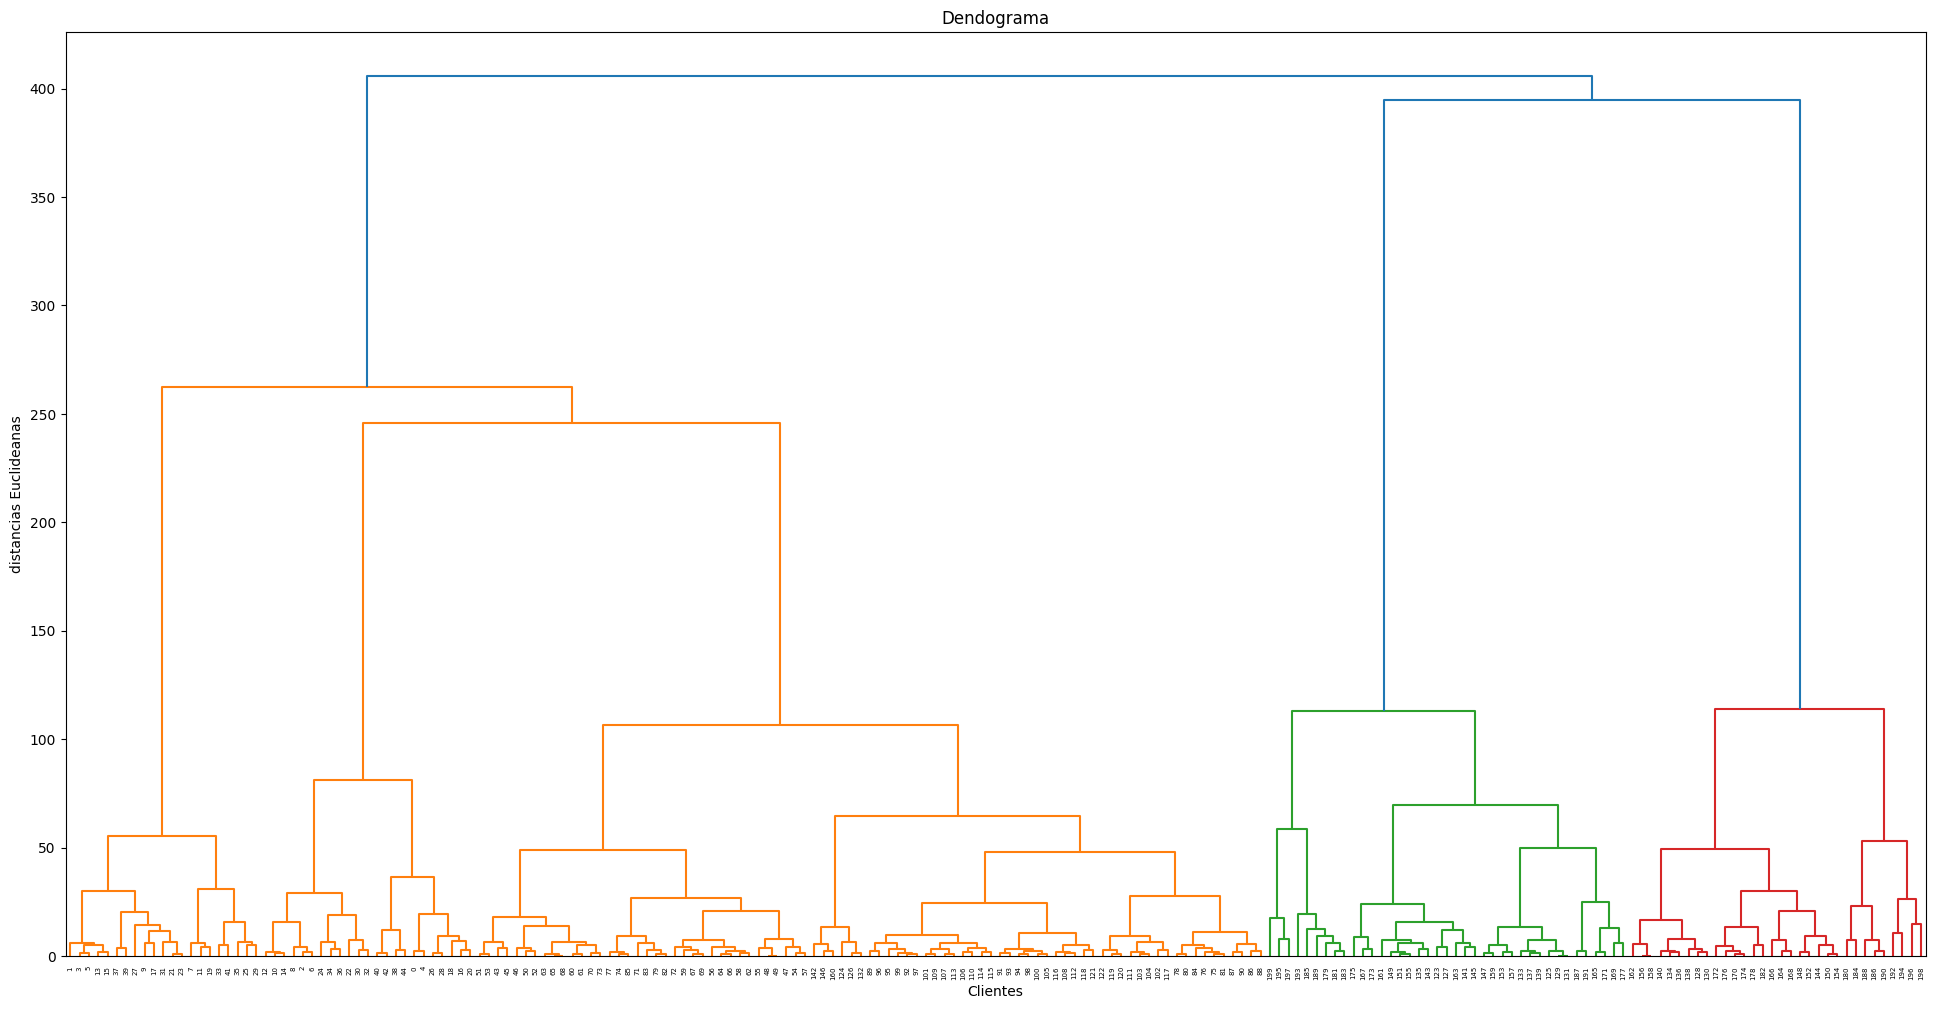

In [19]:
plt.figure(4, figsize= (24,12))
dendrogram = sch.dendrogram(sch.linkage(X, method= "ward"))

plt.title('Dendograma')
plt.xlabel('Clientes')
plt.ylabel('distancias Euclideanas')
plt.show

## Clustering Aglomerativo (Button-up)

In [20]:
Agglo_Clustering = AgglomerativeClustering(n_clusters= 5, linkage= 'average')

cluster = Agglo_Clustering.fit_predict(df_Mall_Customer_encoder)
cluster

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [21]:
#Agrega la columnas 'cluster' al Dataframe
df_Mall_Customer_encoder['cluster'] = pd.DataFrame(cluster)

df_Mall_Customer_encoder

,Genero,Edad,Ingresos Anuales (k$),Puntuacion de gasto (1-100),cluster
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,0
197,1,32,126,74,2
198,1,32,137,18,0


<function matplotlib.pyplot.show(close=None, block=None)>

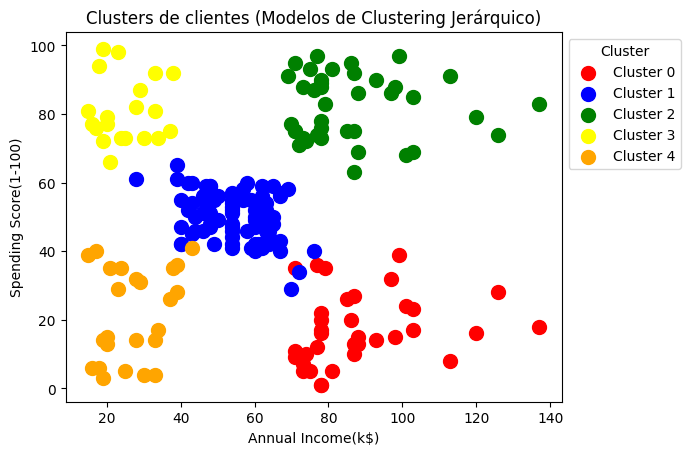

In [22]:
X = df_Mall_Customer_encoder.iloc[:,[2,3]].values
plt.scatter(X[cluster==0, 0], X[cluster==0, 1], s=100, c='red', label='Cluster 0')
plt.scatter(X[cluster==1, 0], X[cluster==1, 1], s=100, c='blue', label='Cluster 1')
plt.scatter(X[cluster==2, 0], X[cluster==2, 1], s=100, c='green', label='Cluster 2')
plt.scatter(X[cluster==3, 0], X[cluster==3, 1], s=100, c='yellow', label='Cluster 3')
plt.scatter(X[cluster==4, 0], X[cluster==4, 1], s=100, c='orange', label='Cluster 4')

plt.title('Clusters de clientes (Modelos de Clustering Jerárquico)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')

plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))
plt.show

## Análisis

1. Cluster 0 - Rojo: Ingreso bajo, gasto bajo. Tipo de cliente: 0
2. Cluster 1 - Azul: Ingreso alto, gasto alto. Tipo de cliente: 1
3. Cluster 2 - Verde: Ingreso medio, gasto medio. Tipo de cliente: 2
4. Cluster 3 - Amarillo: Ingreso alto, gasto bajo. Tipo de cliente: 3
5. Cluster 4 - Naranja: Ingreso bajo, gasto alto. Tipo de cliente: 4


In [23]:
# Sustituye el nombre de la columna 'cluster' por 'Tipo de cliente'
df_Mall_Customer_encoder.rename(columns={'cluster':'Tipo de cliente'})
# Saca una muestra aleatoria de 8 filas
df_Mall_Customer_encoder.sample(8)

,Genero,Edad,Ingresos Anuales (k$),Puntuacion de gasto (1-100),cluster
155,0,27,78,89,2
92,1,48,60,49,1
45,0,24,39,65,1
132,0,25,72,34,1
25,1,29,28,82,3
118,0,51,67,43,1
181,0,32,97,86,2
193,0,38,113,91,2


## K- Means

Clustering por Edad y Puntuación de gastos

Al aplicar clustering jerárquico se tuvieron en cuenta los outliers ya que no el método lo permite. En el caso de clustering K-Means, los outliers pueden generar clusters no deseados.

In [24]:
df_Mall_Kmeans = stats.zscore(df_Mall_Customer_encoder)
df_Mall_Kmeans

,Genero,Edad,Ingresos Anuales (k$),Puntuacion de gasto (1-100),cluster
0,1.128152,-1.424569,-1.738999,-0.434801,1.967025
1,1.128152,-1.281035,-1.738999,1.195704,1.154205
2,-0.886405,-1.352802,-1.700830,-1.715913,1.967025
3,-0.886405,-1.137502,-1.700830,1.040418,1.154205
4,-0.886405,-0.563369,-1.662660,-0.395980,1.967025
...,...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061,0.341384
196,-0.886405,0.441365,2.497807,-0.861839,-1.284256
197,1.128152,-0.491602,2.497807,0.923953,0.341384
198,1.128152,-0.491602,2.917671,-1.250054,-1.284256


In [25]:
score.argmax()

198

In [26]:
df_Mall_Kmeans.drop(198, inplace=True)

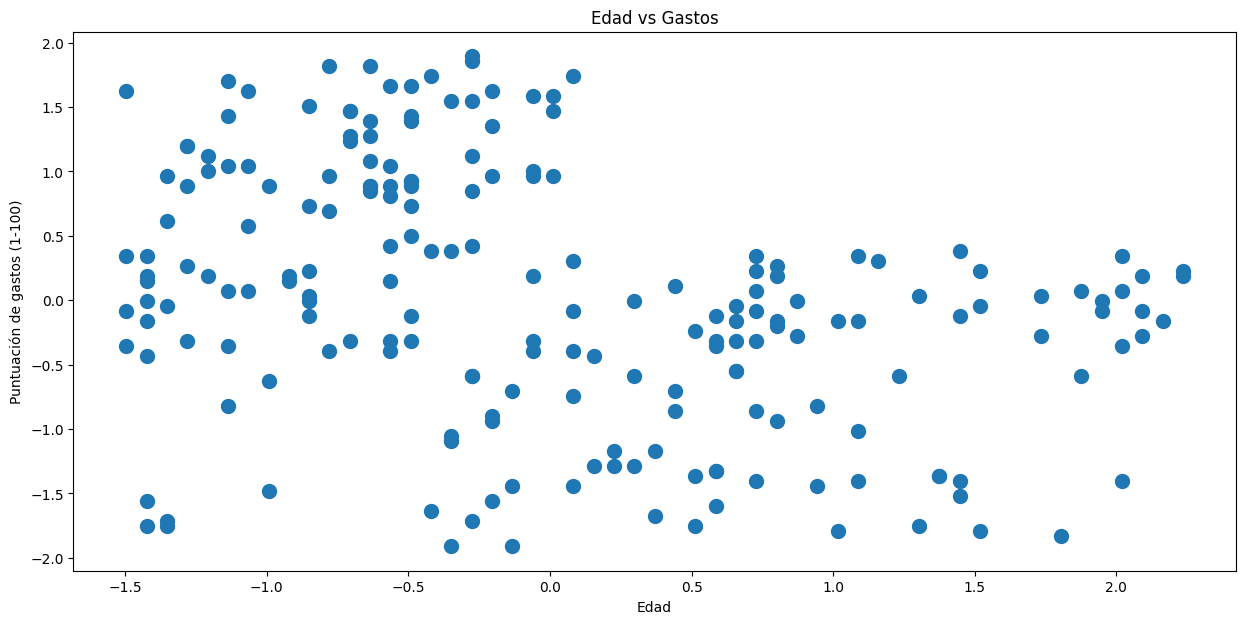

In [27]:
plt.figure(8, figsize=(15, 7))
plt.title('Edad vs Gastos')
plt.xlabel('Edad')
plt.ylabel('Puntuación de gastos (1-100)')
plt.scatter(x='Edad', y='Puntuacion de gasto (1-100)', data= df_Mall_Kmeans, s=100)

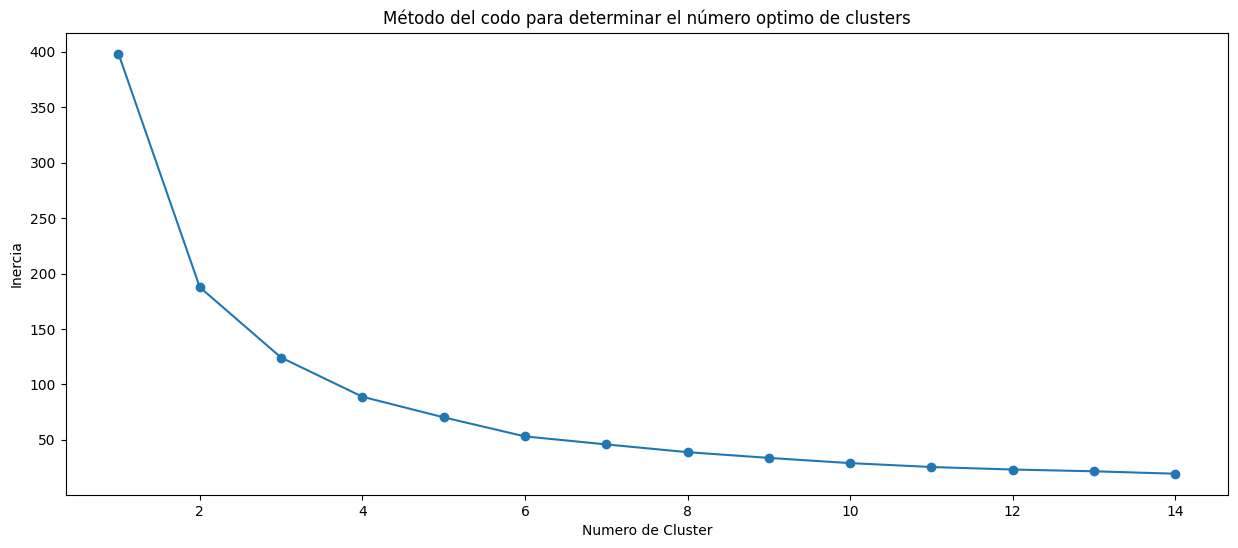

In [28]:
x1 = df_Mall_Kmeans[['Edad', 'Puntuacion de gasto (1-100)']].iloc[:,:].values
incercia = []
for n in range(1, 15):
    grupos = KMeans(n_clusters= n, init='k-means++', n_init= 10, max_iter= 300, random_state= 111, algorithm='elkan')
    grupos.fit(x1)
    incercia.append(grupos.inertia_)

plt.figure(1, figsize= (15,6))
plt.plot(np.arange(1,15), incercia, 'o-')
plt.xlabel('Numero de Cluster')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar el número optimo de clusters')
plt.show()

Se puede observar que el codo marca 4 clusters.

In [29]:
# Se instancia un objeto de la clase KMeans
grupos = KMeans(n_clusters=4,random_state= 111, algorithm='elkan')
grupos

KMeans(algorithm='elkan', n_clusters=4, random_state=111)

In [30]:
# Se ajusta el modelo de clustering a los datos 'x1'
grupos.fit(x1)
# Obtiene las etiquetas asignadas a cada punto de datos despues de la clusterización
labels1 = grupos.labels_
# Imprime las etiquetas asignadas a cada punto de datos después de la clusterización
print(labels1)
# Obtiene los centroides de los clusters encontrados por el algoritmo KMeans
centroids1 = grupos.cluster_centers_
# Se imprimen los centroides de los clusters encontrados
print(centroids1)

[0 1 0 1 0 1 3 1 3 1 2 1 3 1 3 1 0 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 2 1 2 0 3 1 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 0 0 0 0 2 2 2 2 0 0 0 1 0 1 3 1 3 1 3 1 0 1 0 1 3 1 0 1 3 1 0 1 0 1 2 1
 3 1 3 1 3 1 3 1 3 1 3 1 2 1 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 1]
[[-0.88097429 -0.25225755]
 [-0.6339587   1.20079542]
 [ 1.24575012 -0.09349526]
 [ 0.48308996 -1.29429278]]
